<a href="https://colab.research.google.com/github/pythonuzgit/elmurodov/blob/master/Computer%20Vision/Dolphin_vs_whale_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install arrow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 1.4 MB/s eta 0:00:00


Import Libraries

In [9]:
from pathlib import Path
from random import choice
from random import seed
seed(2023)

configure directories

In [13]:

data = Path('/content/dataset')
files = list(data.glob('**/*.jpg'))
dolphins_files = list(data.glob('dolphins water/*.jpg'))
whale_files = list(data.glob('whale water/*.jpg'))
for _ in range(5):
    print(choice(files))

/content/dataset/whale water/Image_11.jpg
/content/dataset/whale water/Image_58.jpg
/content/dataset/whale water/Image_10.jpg
/content/dataset/whale water/Image_76.jpg
/content/dataset/whale water/Image_19.jpg


In [14]:
list(data.glob('**/*.jpg'))[:5]

[PosixPath('/content/dataset/dolphins water/Image_99.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_84.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_27.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_26.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_68.jpg')]

In [15]:
list(data.glob('dolphins water/*.*'))[:5]

[PosixPath('/content/dataset/dolphins water/Image_48.GIF'),
 PosixPath('/content/dataset/dolphins water/Image_99.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_84.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_27.jpg'),
 PosixPath('/content/dataset/dolphins water/Image_26.jpg')]

In [16]:
list(data.glob('whale water/*.*'))[:5]

[PosixPath('/content/dataset/whale water/Image_99.jpg'),
 PosixPath('/content/dataset/whale water/Image_27.jpg'),
 PosixPath('/content/dataset/whale water/Image_26.jpg'),
 PosixPath('/content/dataset/whale water/Image_68.jpg'),
 PosixPath('/content/dataset/whale water/Image_46.jpg')]

In [17]:
from PIL import Image

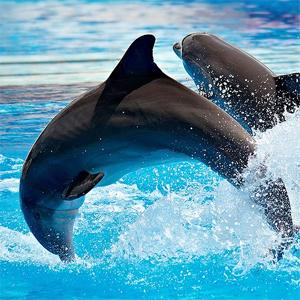

In [18]:
Image.open(str(list(data.glob('dolphins water/*.*'))[5]))

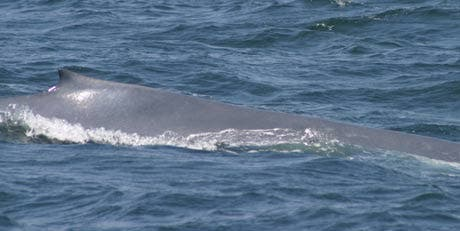

In [19]:
Image.open(str(list(data.glob('whale water/*.*'))[5]))

In [46]:
from arrow import now
import cv2
from cv2 import imread
from cv2 import resize
from numpy import array

In [21]:
fishs = {
    'dolphins water': list(data.glob('dolphins water/*.*')),
    'whale water': list(data.glob('whale water/*.*'))
}

In [22]:
labels = {
    'dolphins water' : 1,
    'whale water' : 0
}

In [51]:
X = []
Y = []
missing_image_count = 0
success_files = []
for name, file_list in fishs.items():
    dog_or_cat = labels[name]
    for filename in file_list:
        try:
            image = imread(filename=str(filename).strip())
            if image is not None:
                X.append(resize(src=image, dsize=(200, 200)))
                Y.append(dog_or_cat)
                success_files.append(filename)
            else:
                missing_image_count += 1
        except Exception as e:
            pass

In [52]:
print('array lengths: X: {} Y: {}'.format(len(X), len(Y)))

array lengths: X: 152 Y: 152


In [53]:
len(X)

152

In [54]:
print(len(Y))

152


In [55]:
import numpy as np
X = np.array(X)
Y= np.array(Y)

In [56]:
X.shape

(152, 200, 200, 3)

using the train test split function

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42,stratify=Y)

Train the model with dolphins water and whale water Datasets

In [43]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import Sequential
from tensorflow.keras.regularizers import l2

In [47]:
EPOCHS = 10

model_start = now()
model = Sequential([
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(200, 200, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(64, activation='relu', kernel_regularizer=l2(0.05)),
    layers.Dense(1, activation='sigmoid'),
])
model.compile(
    loss = 'binary_crossentropy',
    metrics=['accuracy', 'binary_accuracy'],
    optimizer='adam',
)

fit_history = model.fit(x=X_train, y=y_train, epochs=EPOCHS)
evaluate_result = model.evaluate(x=X_test, y=y_test, batch_size=None, verbose='auto', sample_weight=None, steps=None, callbacks=None,
                                 max_queue_size=10, workers=1, use_multiprocessing=False, return_dict=True,)
print(evaluate_result)
print('model time: {}'.format(now() - model_start))

Epoch 1/10
4/4 [==============================] - 10s 2s/step - loss: 1851.0736 - accuracy: 0.4463 - binary_accuracy: 0.4463
Epoch 2/10
4/4 [==============================] - 8s 2s/step - loss: 513.3881 - accuracy: 0.4215 - binary_accuracy: 0.4215
Epoch 3/10
4/4 [==============================] - 7s 2s/step - loss: 134.9299 - accuracy: 0.4628 - binary_accuracy: 0.4628
Epoch 4/10
4/4 [==============================] - 8s 2s/step - loss: 25.1444 - accuracy: 0.5785 - binary_accuracy: 0.5785
Epoch 5/10
4/4 [==============================] - 7s 2s/step - loss: 9.2810 - accuracy: 0.8182 - binary_accuracy: 0.8182
Epoch 6/10
4/4 [==============================] - 10s 3s/step - loss: 9.4596 - accuracy: 0.8512 - binary_accuracy: 0.8512
Epoch 7/10
4/4 [==============================] - 7s 2s/step - loss: 9.6323 - accuracy: 0.9587 - binary_accuracy: 0.9587
Epoch 8/10
4/4 [==============================] - 8s 2s/step - loss: 9.7276 - accuracy: 0.9835 - binary_accuracy: 0.9835
Epoch 9/10
4/4 [======

<Axes: >

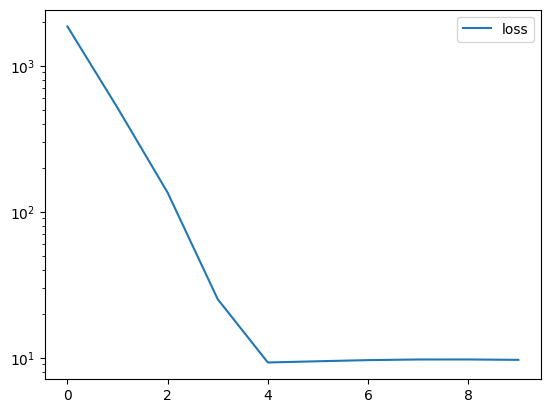

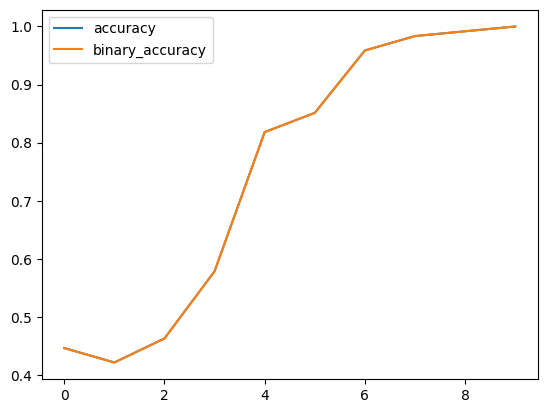

In [48]:
import pandas as pd
history_df = pd.DataFrame(fit_history.history)
history_df.loc[:, ['loss', ]].plot(logy=True)
history_df.loc[:, ['accuracy', 'binary_accuracy']].plot()

In [57]:
from random import randint
from random import seed
seed(2023)

total = 0
correct = 0
checks = []
for _ in range(100):
    index = randint(0, len(X))
    checks.append(index)
    model_result = model(X[index].reshape(1, 200, 200, 3), training=False)
    value = model_result.numpy()[0][0]
    binary_value = 0 if value < 0.5 else 1
    correct += 1 if  binary_value == Y[index] else 0
    print(index, value, binary_value, Y[index], binary_value == Y[index])
    total += 1
print(round(correct / total, 2))

98 6.181686e-10 0 0 True
114 0.00023899453 0 0 True
99 5.7451712e-15 0 0 True
81 4.556414e-06 0 0 True
146 0.02137776 0 0 True
86 0.0013991512 0 0 True
25 0.99999374 1 1 True
31 1.0 1 1 True
77 0.005173765 0 0 True
136 7.400449e-07 0 0 True
135 1.0985029e-05 0 0 True
77 0.005173765 0 0 True
45 0.99806166 1 1 True
59 0.99997336 1 1 True
45 0.99806166 1 1 True
4 1.0 1 1 True
53 1.0 1 1 True
92 0.043358408 0 0 True
17 0.99883026 1 1 True
32 0.22593775 0 1 False
9 0.9996296 1 1 True
51 1.0 1 1 True
39 0.9499821 1 1 True
122 3.0269547e-08 0 0 True
114 0.00023899453 0 0 True
136 7.400449e-07 0 0 True
87 5.4433676e-06 0 0 True
128 2.1057214e-10 0 0 True
16 0.99999976 1 1 True
19 0.9999633 1 1 True
137 1.4170699e-05 0 0 True
118 2.1907383e-08 0 0 True
127 2.4652245e-06 0 0 True
7 0.6345366 1 1 True
31 1.0 1 1 True
146 0.02137776 0 0 True
60 1.0 1 1 True
27 0.99944 1 1 True
148 1.3614958e-08 0 0 True
18 0.99755627 1 1 True
17 0.99883026 1 1 True
35 0.9998919 1 1 True
99 5.7451712e-15 0 0 True
1

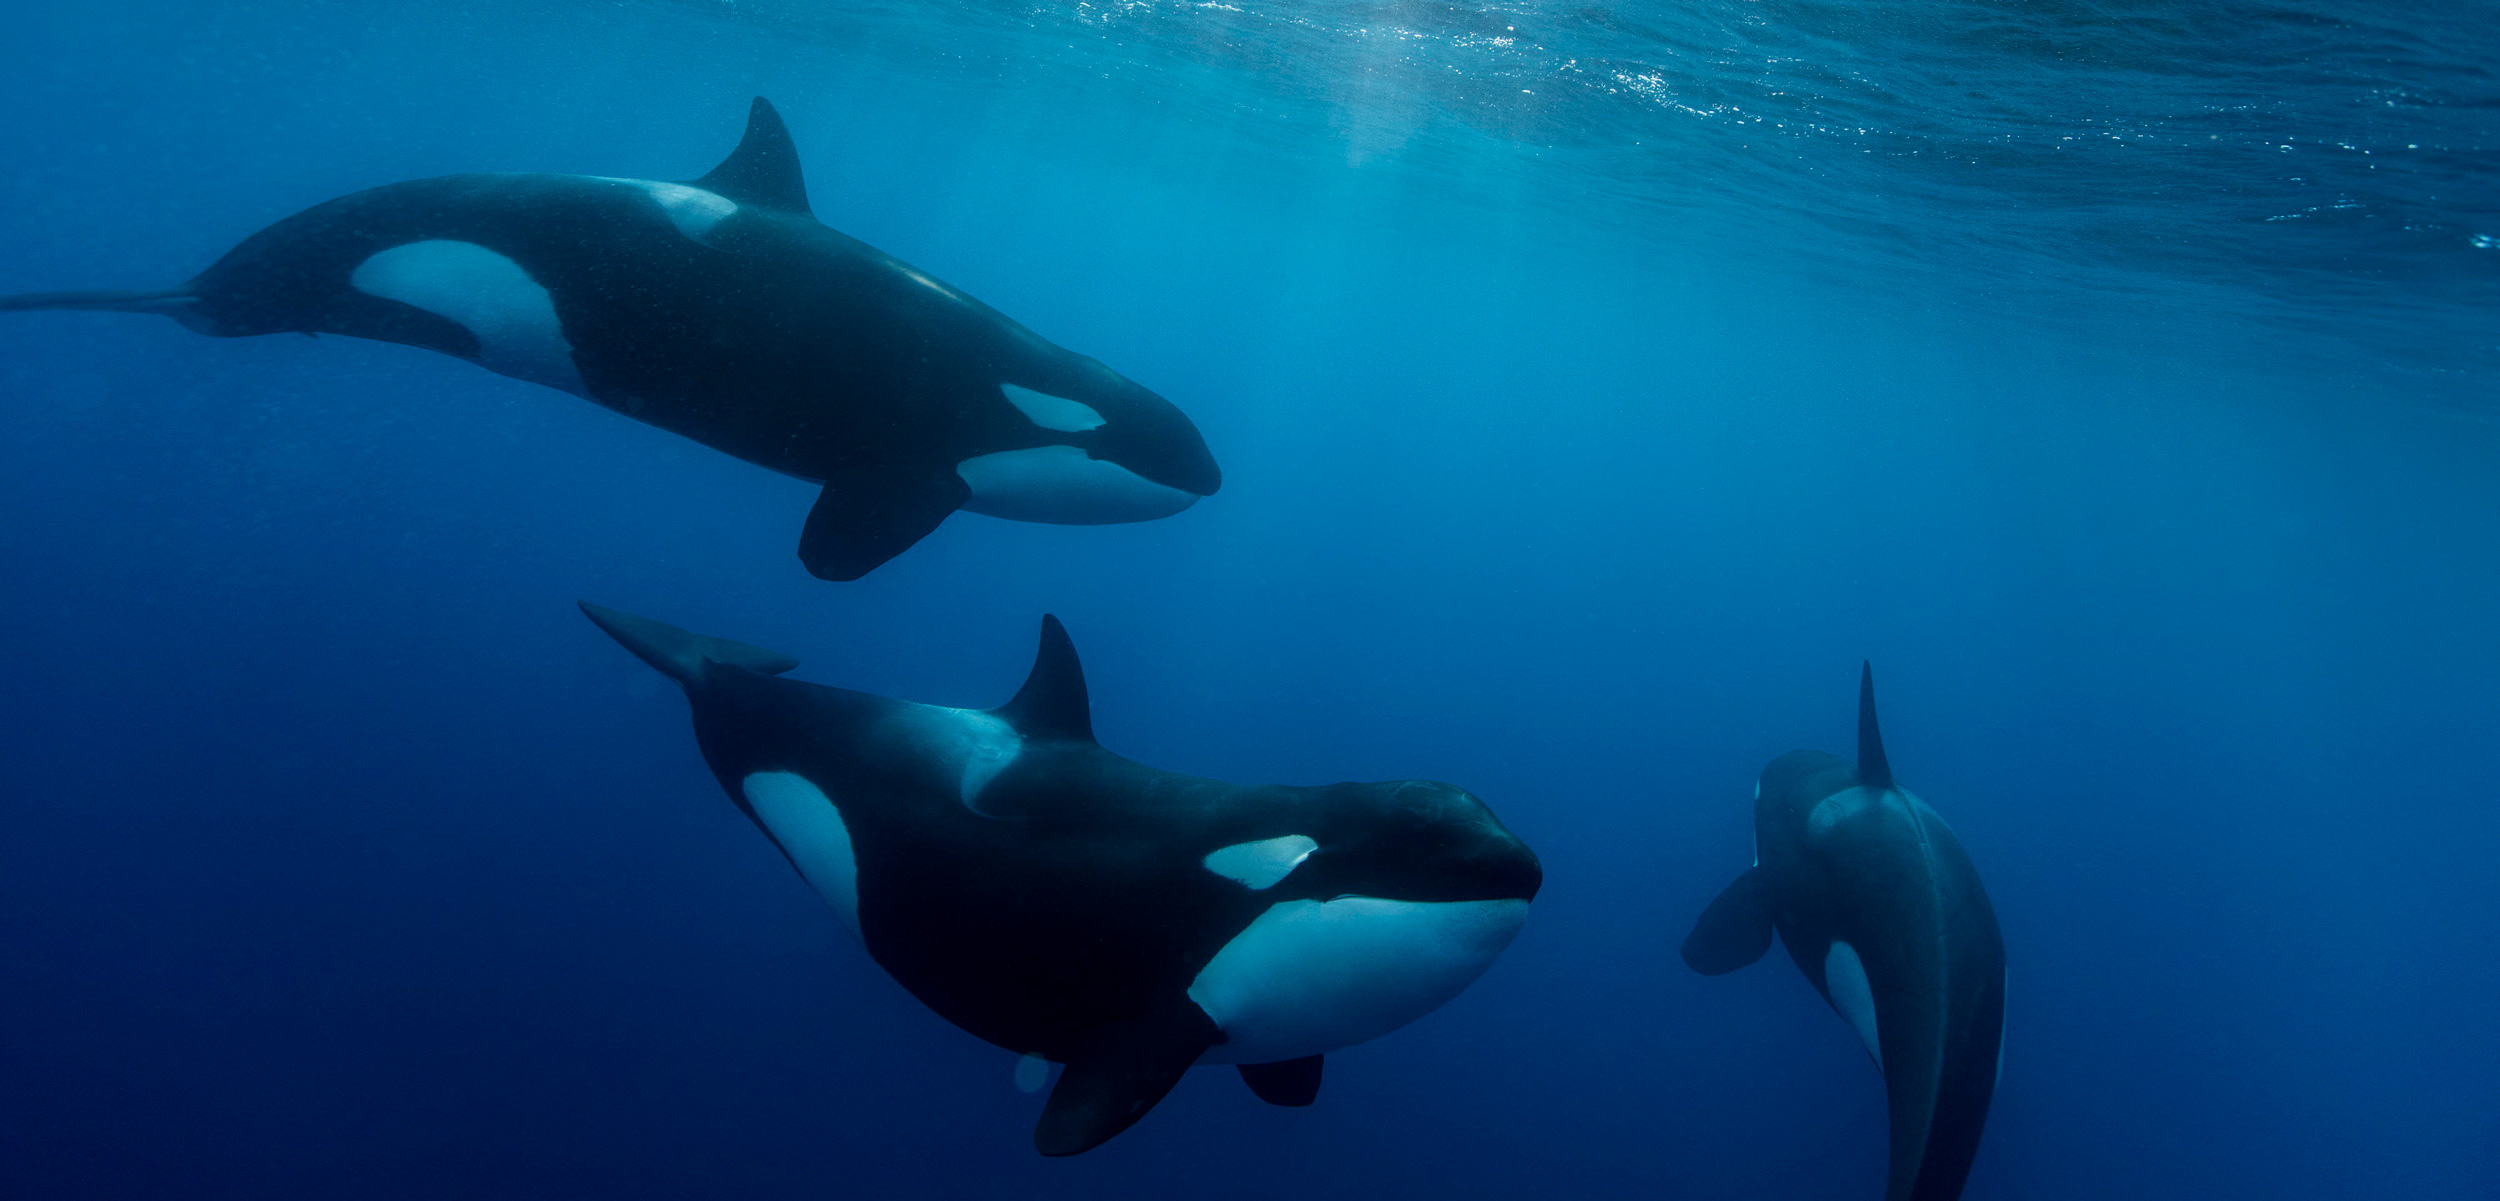

In [58]:
Image.open(mode='r', fp=success_files[checks[3]])